<a href="https://colab.research.google.com/github/starvar7169/leadbasic/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Random Forest** is best for prediction.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score
from sklearn.metrics import precision_score, matthews_corrcoef, confusion_matrix

data=pd.read_csv("creditcard[1].csv")
print(data.shape)
print(data.describe())

(17918, 31)
               Time            V1            V2            V3            V4  \
count  17918.000000  17918.000000  17918.000000  17918.000000  17918.000000   
mean   13905.276259     -0.244970      0.258166      0.777804      0.291614   
std     9867.916251      1.893161      1.508296      1.766872      1.479519   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%     3781.250000     -0.959806     -0.305367      0.338327     -0.629972   
50%    12347.500000     -0.306803      0.235061      0.924255      0.230058   
75%    23775.000000      1.164015      0.876538      1.557391      1.155770   
max    29031.000000      1.960497     16.713389      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  17917.000000  17917.000000  17917.000000  17917.000000  17917.000000   
mean      -0.146329      0.099878     -0.150970      0.012969      0.734707   
std        1.423917      1.327756      

missing data

In [20]:
print(data.isnull().sum())
data_new = data.dropna()
print(data_new.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


0.004541376990356582
Fraud Cases: 81
Valid Transactions:17836 


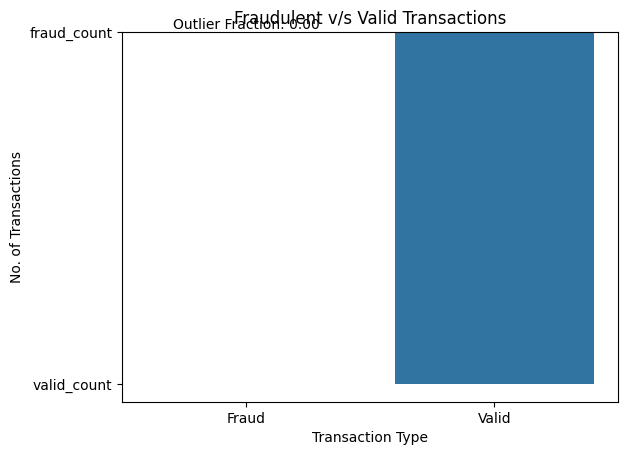

In [22]:
fraud=data_new[data_new['Class']==1]
valid=data_new[data_new['Class']==0]
outlierFraction=len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}' .format(len(data_new[data_new['Class']==1])))
print('Valid Transactions:{} ' .format(len(data_new[data_new['Class']==0])))
sns.barplot(x=['Fraud', 'Valid'], y=['fraud_count', 'valid_count'])
plt.title('Fraudulent v/s Valid Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('No. of Transactions')
plt.text(0, 'fraud_count', f'Outlier Fraction: {outlierFraction:.2f}', ha='center', va='bottom')
plt.show()

In [23]:
print("Amount detail about Frauds:", fraud.Amount.describe())

Amount detail about Frauds: count      81.000000
mean       98.105926
std       267.464067
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64


In [24]:
print("Amount detail about Valid Transaction:", valid.Amount.describe())

Amount detail about Valid Transaction: count    17836.000000
mean        67.365025
std        188.754429
min          0.000000
25%          5.490000
50%         15.950000
75%         56.232500
max       7712.430000
Name: Amount, dtype: float64


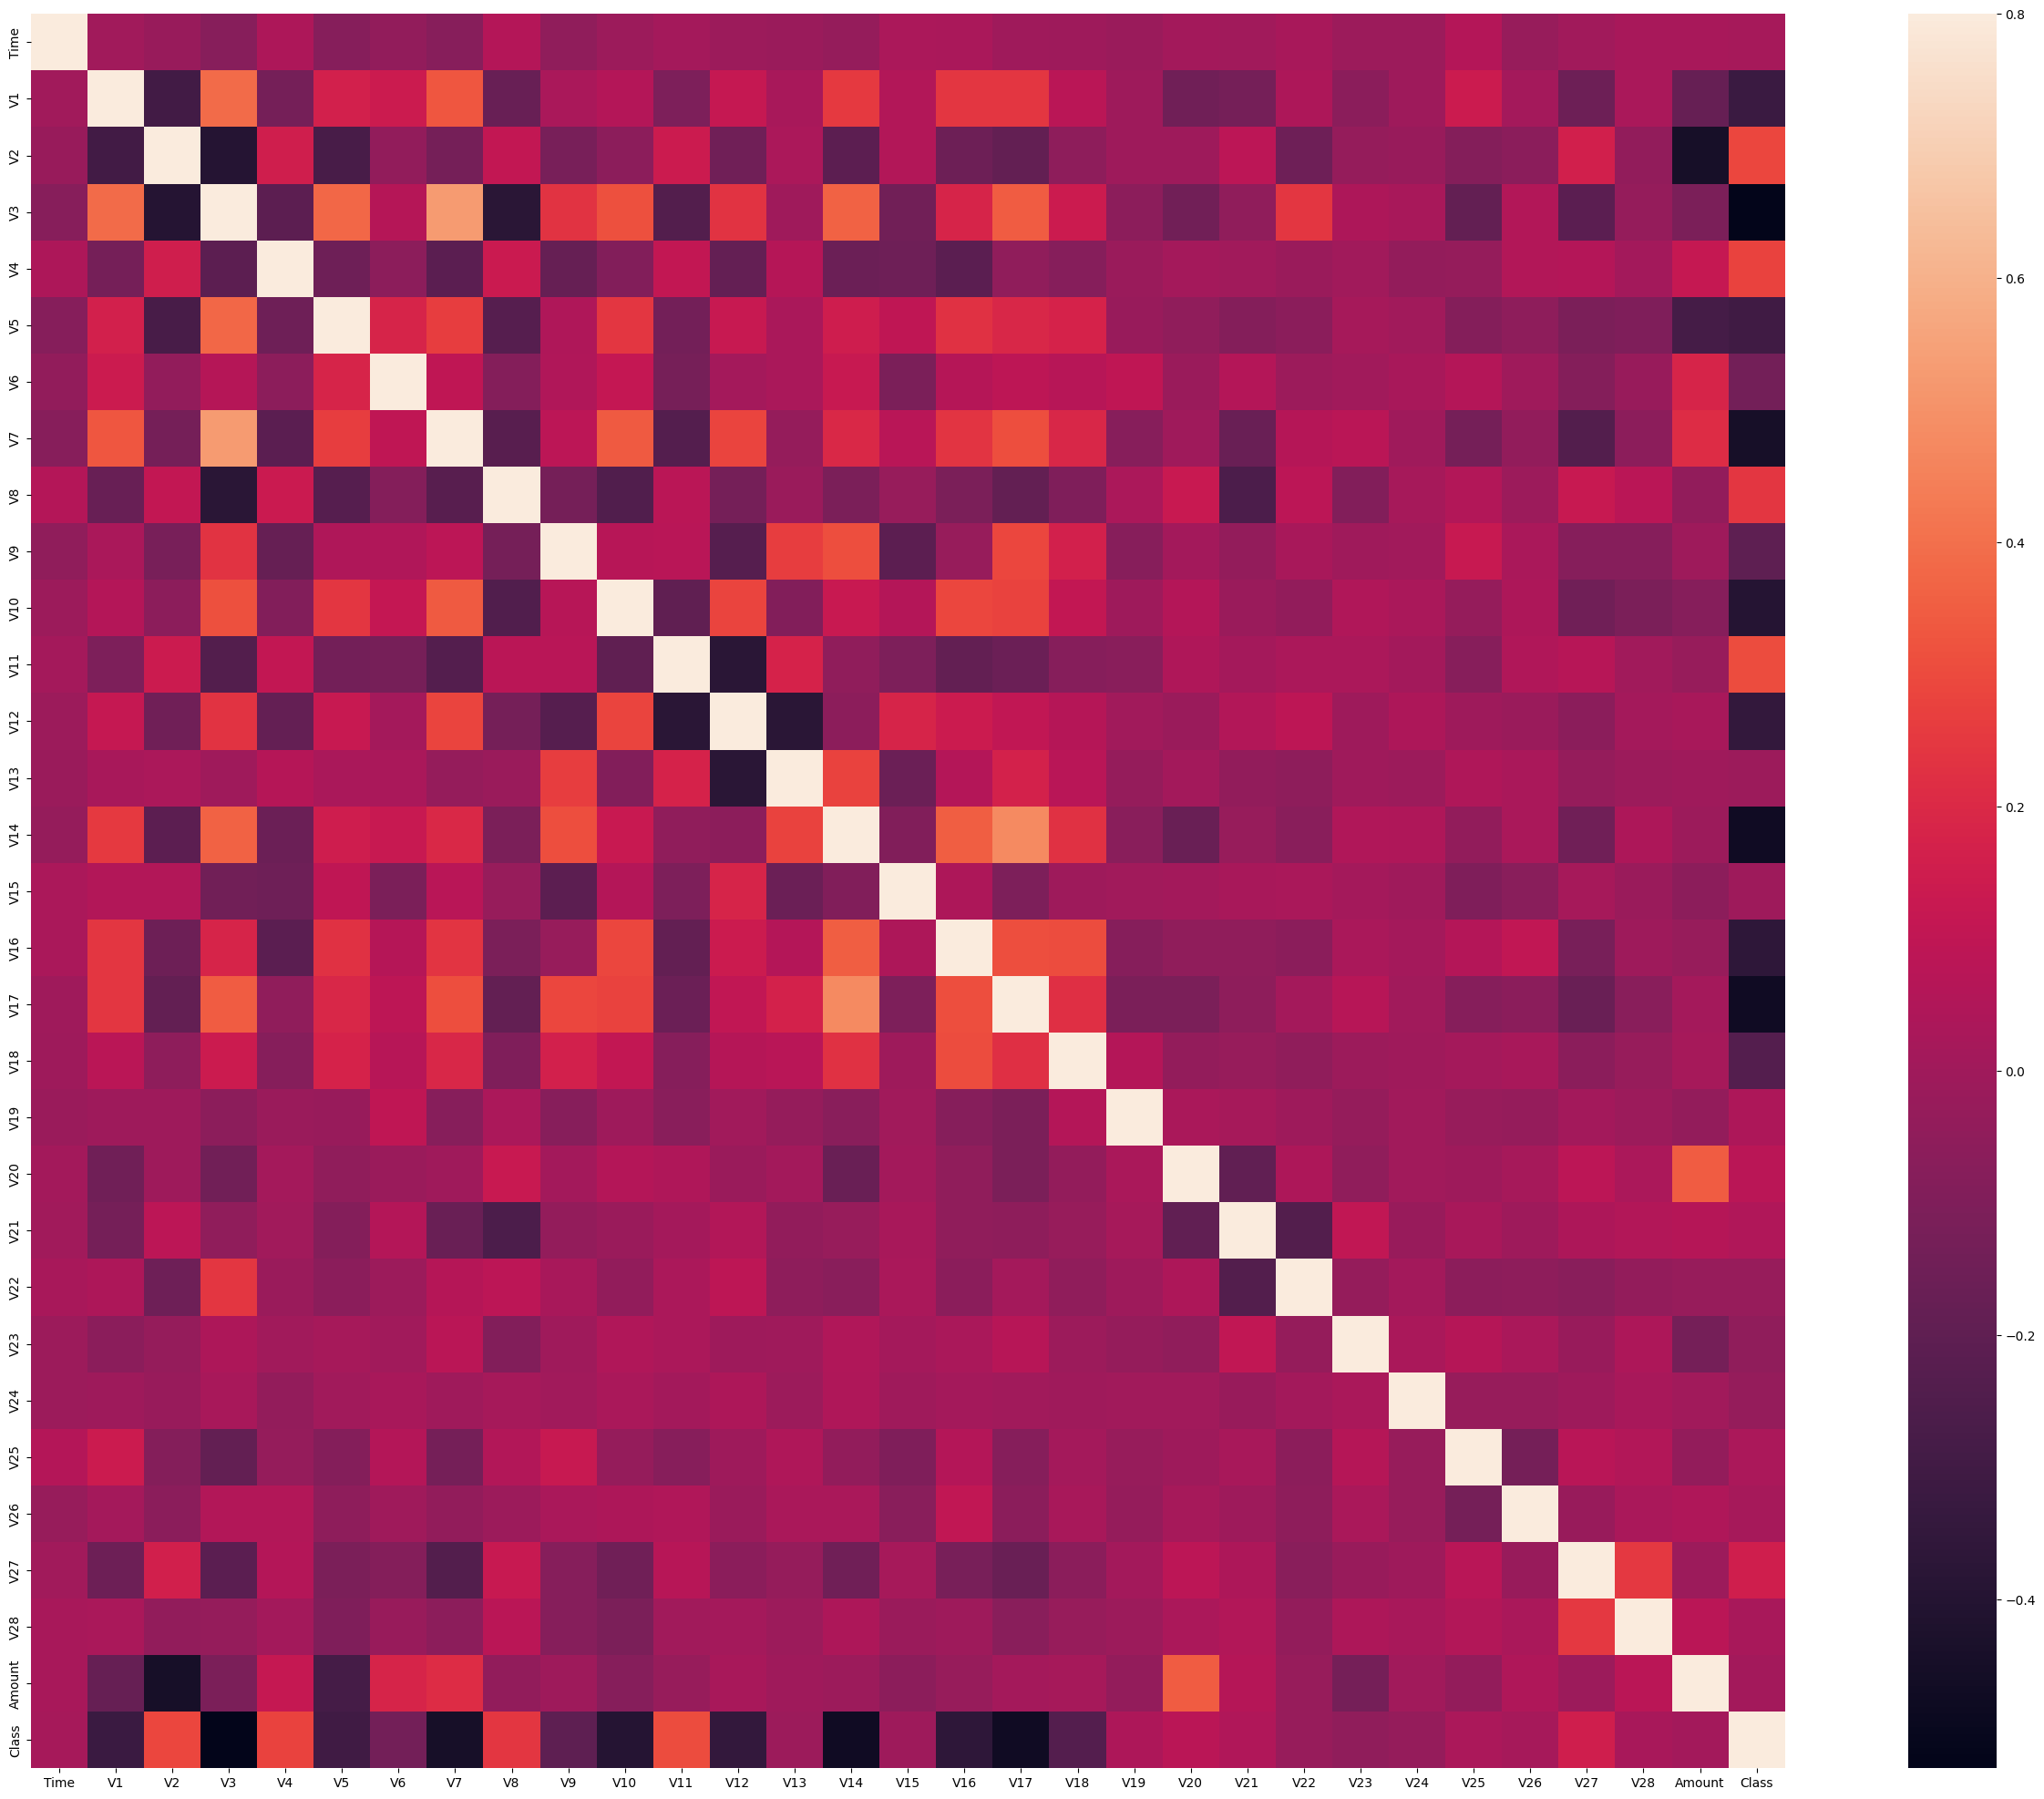

In [25]:
corr=data.corr()
fig=plt.figure(figsize=(35, 25))
sns.heatmap(corr, vmax=.8, square=True)
plt.show()

In [26]:
X=data_new.drop(['Class'], axis=1)
Y=data_new['Class']
print(X.shape)
print(Y.shape)
xData= X.values
yData= Y.values

(17917, 30)
(17917,)


In [27]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(xData, yData, test_size=0.2, random_state=40)
rfc= RandomForestClassifier()
rfc.fit(X_train, Y_train)
yPred= rfc.predict(X_test)

In [31]:
acc = accuracy_score(Y_test, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(Y_test, yPred)
print("The precision is {}".format(prec))

rec = recall_score(Y_test, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(Y_test, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(Y_test, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))
print("The model used for Fraud Detection is Random Forest Classifier!")

The accuracy is 0.9994419642857143
The precision is 1.0
The recall is 0.8333333333333334
The F1-Score is 0.9090909090909091
The Matthews correlation coefficient is0.9126154734744095
The model used for Fraud Detection is Random Forest Classifier!


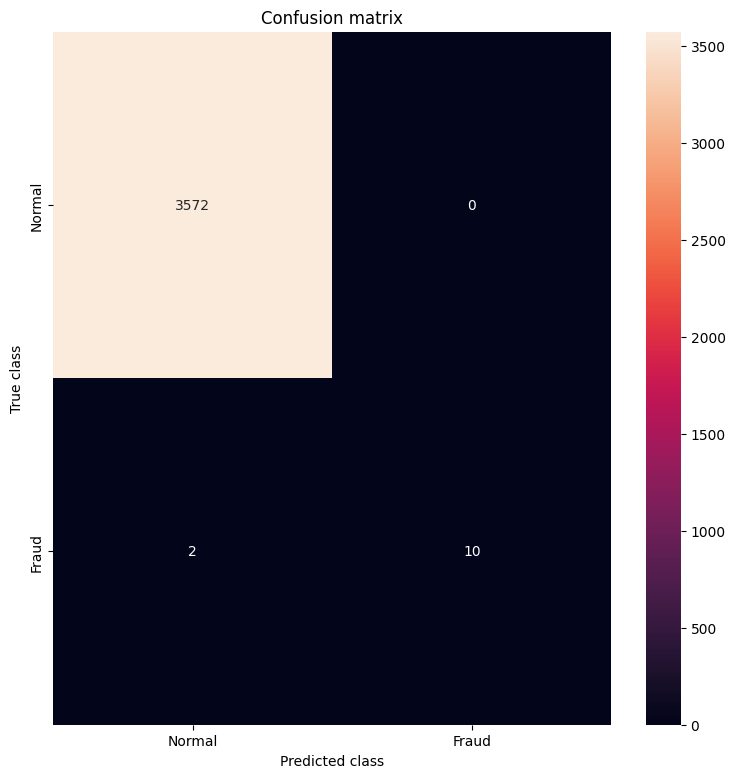

In [35]:
labels=['Normal', 'Fraud']
conf_matrix=confusion_matrix(Y_test, yPred)
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, xticklabels = labels,
            yticklabels = labels, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()